In [148]:
import pandas as pd

In [149]:
df = pd.read_csv("datasets/building_1_year.csv", sep=';')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35019 entries, 0 to 35018
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date and time                                 35019 non-null  object
 1   Internal temperature area 1 (Celsius degree)  33797 non-null  object
 2   Internal temperature area 2 (Celsius degree)  33805 non-null  object
 3   External temperature (Celsius degree)         35018 non-null  object
 4   HVAC power (kW)                               34699 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [151]:
df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float)
df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float)
df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float)
df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float)

In [152]:
df['Date and time'] = pd.to_datetime(df['Date and time'], format='%d/%m/%Y %H:%M:%S')

In [66]:
df.tail()

,Date and time,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW)
41394,2022-11-13 23:00:00,21.500000,21.6,10.62,3.308333
41395,2022-11-13 23:15:00,21.000000,21.0,10.51,2.303556
41396,2022-11-13 23:30:00,19.357143,20.0,10.55,4.990667
41397,2022-11-13 23:45:00,20.500000,21.0,10.55,2.271667
41398,2022-11-14 00:00:00,21.500000,21.5,10.55,2.800222


In [67]:
print(df.dtypes)

Date and time                                   datetime64[ns]
Internal temperature area 1 (Celsius degree)           float64
Internal temperature area 2 (Celsius degree)           float64
External temperature (Celsius degree)                  float64
HVAC power (kW)                                        float64
dtype: object


In [68]:
df.head()

,Date and time,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW)
0,2021-09-08 12:15:00,20.0,20.0,NaN,8.680000
1,2021-09-08 12:30:00,NaN,NaN,NaN,7.985222
2,2021-09-08 12:45:00,NaN,NaN,NaN,14.233111
3,2021-09-08 13:00:00,NaN,NaN,NaN,14.100000
4,2021-09-08 13:15:00,NaN,NaN,NaN,14.100000


In [69]:
def get_null_info(df):
  """
  This function provides detailed information about null values in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
      A dictionary containing information about null values for each column.
  """
  null_info = {}
  for col in df.columns:
    null_count = df[col].isnull().sum()
    null_perc = null_count / len(df) * 100
    consecutive_nulls = df[col].isnull().cumsum().max()  # Max consecutive nulls
    null_info[col] = {'Count': null_count, 'Percentage': null_perc, 'Consecutive Nulls': consecutive_nulls}
  return null_info

In [70]:
null_value_info = get_null_info(df.copy())
print(null_value_info)

{'Date and time': {'Count': 0, 'Percentage': 0.0, 'Consecutive Nulls': 0}, 'Internal temperature area 1 (Celsius degree)': {'Count': 1328, 'Percentage': 3.2078069518587404, 'Consecutive Nulls': 1328}, 'Internal temperature area 2 (Celsius degree)': {'Count': 1246, 'Percentage': 3.0097345346505953, 'Consecutive Nulls': 1246}, 'External temperature (Celsius degree)': {'Count': 5286, 'Percentage': 12.768424358076283, 'Consecutive Nulls': 5286}, 'HVAC power (kW)': {'Count': 320, 'Percentage': 0.7729655305683713, 'Consecutive Nulls': 320}}


In [71]:
import matplotlib.pyplot as plt


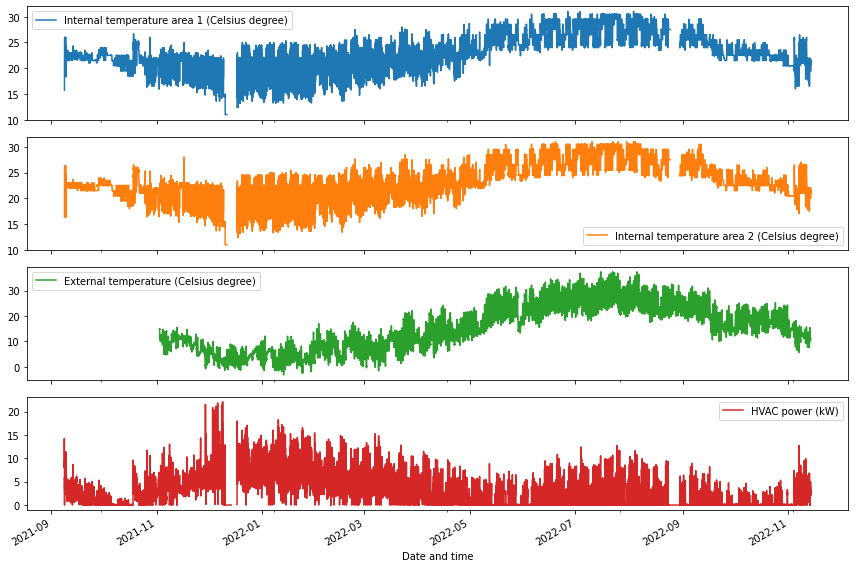

In [72]:
df.set_index('Date and time', inplace=True)

# Plot the last 4 columns
df.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [73]:
df.set_index('Date and time', inplace=True)

# Plot the last 4 columns
df.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

KeyError: "None of ['Date and time'] are in the columns"

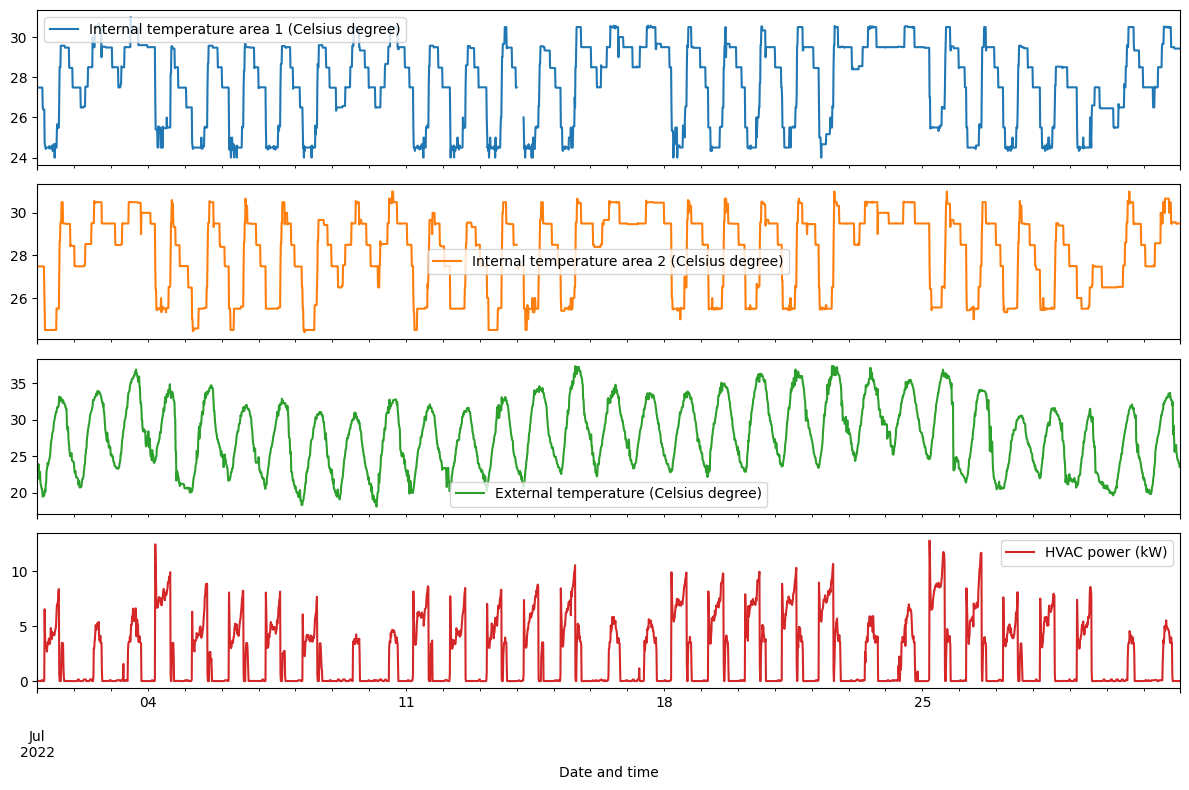

In [ ]:
target_month = 7  # October

# Filter data for the specified month
df_month = df[df.index.month == target_month]

# Plot the data for the specified month
df_month.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

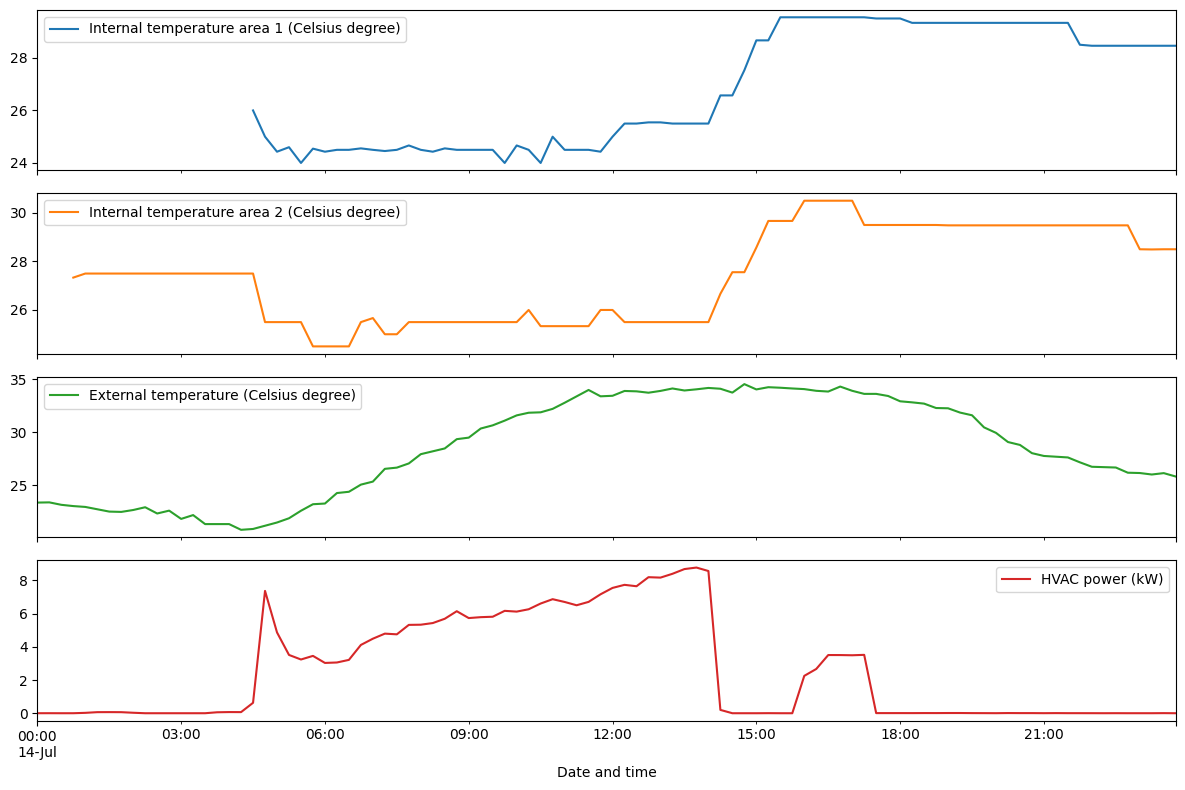

In [ ]:
# Specify the desired day
target_day = '2022-07-14'  # Replace with your desired date

# Filter data for the specified day
df_day = df[df.index.date == pd.to_datetime(target_day).date()]

# Plot the data for the specified day
df_day.plot(subplots=True, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [81]:
df

,Date,value1,value2,has_nan
0,2023-11-28,1.0,3.0,False
1,2023-11-28,2.0,NaN,True
2,2023-11-29,NaN,5.0,True
3,2023-11-30,4.0,6.0,False


In [80]:
df

,Date,value1,value2,has_nan
0,2023-11-28,1.0,3.0,False
1,2023-11-28,2.0,NaN,True
2,2023-11-29,NaN,5.0,True
3,2023-11-30,4.0,6.0,False


In [153]:
df['Date and time'] = df['Date and time'].astype(str)

# Split the 'Date and time' column into 'Date' and 'Time' columns
df[['Date', 'Time']] = df['Date and time'].str.split(' ', expand=True)

# Drop the original 'Date and time' column
df = df.drop('Date and time', axis=1)

print(df)

       Internal temperature area 1 (Celsius degree)  \
0                                         22.000000   
1                                         22.250000   
2                                         21.500000   
3                                         21.500000   
4                                         21.500000   
...                                             ...   
35014                                     21.800000   
35015                                     21.500000   
35016                                     21.000000   
35017                                     19.357143   
35018                                     20.500000   

       Internal temperature area 2 (Celsius degree)  \
0                                              22.5   
1                                              22.5   
2                                              22.5   
3                                              22.5   
4                                              22.5   
...      

In [154]:
df

,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW),Date,Time
0,22.000000,22.5,11.20,3.231222,2021-11-14,00:00:00
1,22.250000,22.5,11.20,3.928539,2021-11-14,00:15:00
2,21.500000,22.5,11.21,2.988222,2021-11-14,00:30:00
3,21.500000,22.5,11.20,3.238444,2021-11-14,00:45:00
4,21.500000,22.5,11.37,3.334889,2021-11-14,01:00:00
...,...,...,...,...,...,...
35014,21.800000,22.0,10.62,3.010000,2022-11-13,22:45:00
35015,21.500000,21.6,10.62,3.308333,2022-11-13,23:00:00
35016,21.000000,21.0,10.51,2.303556,2022-11-13,23:15:00
35017,19.357143,20.0,10.55,4.990667,2022-11-13,23:30:00


In [159]:
print(df_result)

25     2021-12-09
26     2021-12-10
27     2021-12-11
28     2021-12-12
29     2021-12-13
30     2021-12-14
31     2021-12-15
32     2021-12-16
33     2021-12-17
92     2022-02-14
181    2022-05-14
212    2022-06-14
242    2022-07-14
273    2022-08-14
283    2022-08-24
284    2022-08-25
285    2022-08-26
286    2022-08-27
287    2022-08-28
288    2022-08-29
289    2022-08-30
304    2022-09-14
334    2022-10-14
Name: Date, dtype: object


In [160]:
filtered_df = df[~df['Date'].isin(df_result)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32811 entries, 0 to 35018
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Internal temperature area 1 (Celsius degree)  32811 non-null  float64
 1   Internal temperature area 2 (Celsius degree)  32811 non-null  float64
 2   External temperature (Celsius degree)         32811 non-null  float64
 3   HVAC power (kW)                               32811 non-null  float64
 4   Date                                          32811 non-null  object 
 5   Time                                          32811 non-null  object 
 6   has_nan                                       32811 non-null  bool   
dtypes: bool(1), float64(4), object(2)
memory usage: 1.8+ MB


1


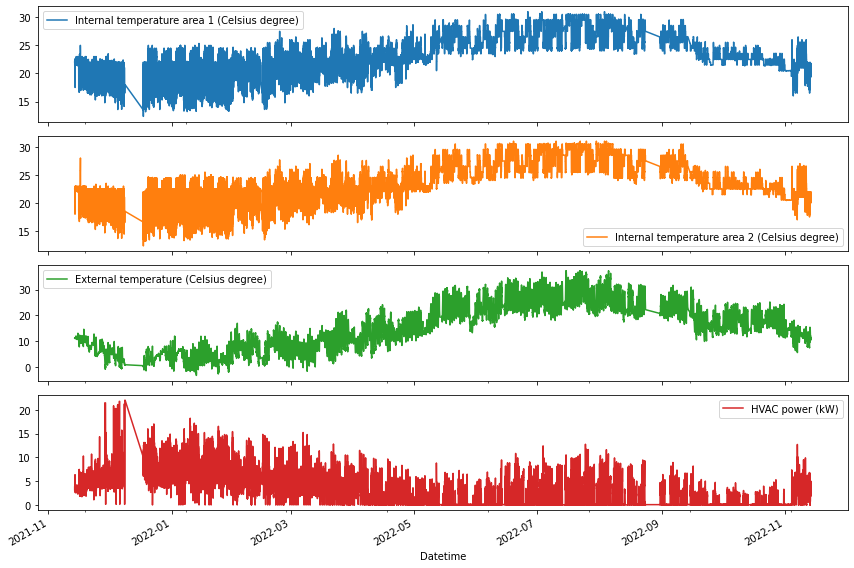

2


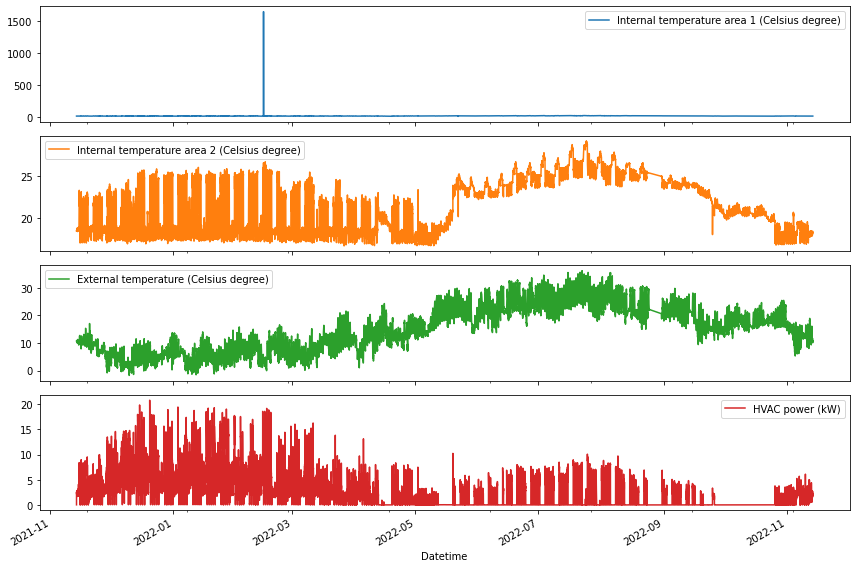

3


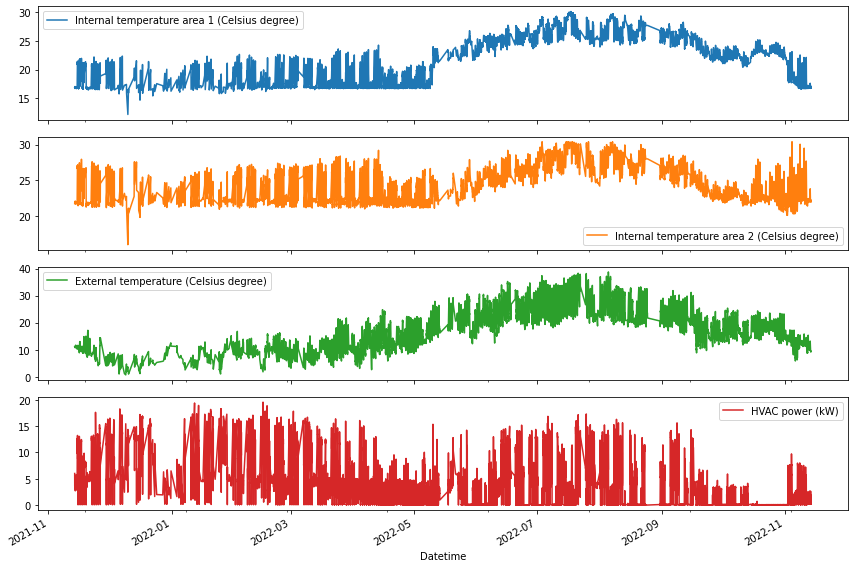

4


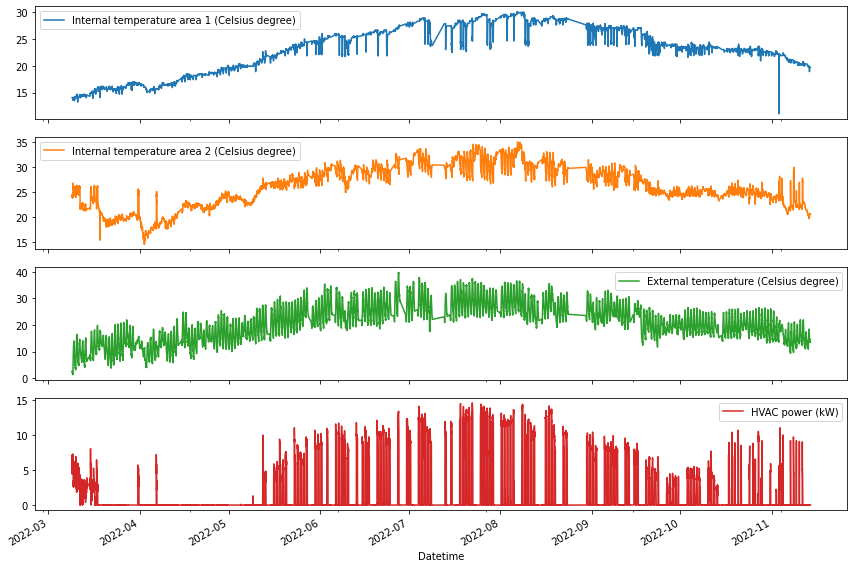

5


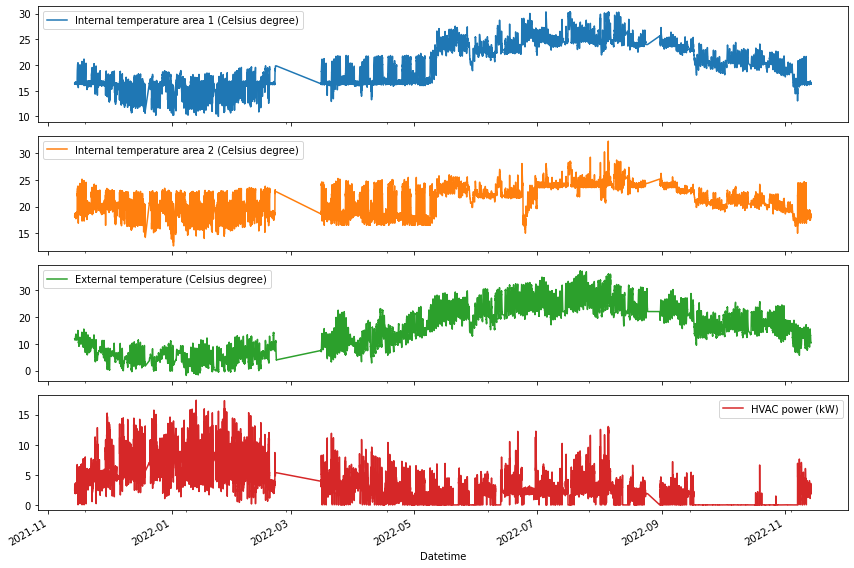

In [189]:
for i in range(1,6):
    print(i)
    df = pd.read_csv(f"datasets/building_{i}_year.csv", sep=';')

    # Split Date and Time
    df['Date and time'] = df['Date and time'].astype(str)
    df[['Date', 'Time']] = df['Date and time'].str.split(' ', expand=True)
    df = df.drop('Date and time', axis=1)

    # Count if there are NaN inside rows
    nan_date = check_nan_per_day(df)
    df_nan_date = nan_date[nan_date['any_nan'] == True]['Date']

    # Count if there are missing measurements
    measurement_date_under96 = count_measurements_per_day(df)
    df_date_to_remove = pd.concat([df_nan_date, measurement_date_under96], ignore_index=True)
    #print(f'building_{i}_year')
    #print(df_date_to_remove)

    # Save inside CSV
    df = df[~df['Date'].isin(df_date_to_remove)]
    df = df.drop(columns='has_nan')
    df.to_csv(f"datasets/building_{i}_clean.csv", index=False, sep=";")

    # Typing as float
    df['Internal temperature area 1 (Celsius degree)'] = df['Internal temperature area 1 (Celsius degree)'].str.replace(',', '.').astype(float)
    df['Internal temperature area 2 (Celsius degree)'] = df['Internal temperature area 2 (Celsius degree)'].str.replace(',', '.').astype(float)
    df['HVAC power (kW)'] = df['HVAC power (kW)'].str.replace(',', '.').astype(float)
    df['External temperature (Celsius degree)'] = df['External temperature (Celsius degree)'].str.replace(',', '.').astype(float)

    # Plot entire dataset
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
    df.set_index('Datetime', inplace=True)
    df = df.drop(['Date', 'Time'], axis=1)
    df.plot(subplots=True, figsize=(12, 8))
    plt.tight_layout()
    plt.show()




In [181]:
df = pd.read_csv("datasets/building_1_clean.csv", sep=',')
df.head()

,Internal temperature area 1 (Celsius degree),Internal temperature area 2 (Celsius degree),External temperature (Celsius degree),HVAC power (kW),Date,Time
0,22,"22,5","11,2","3,2312222222222236",14/11/2021,00:00:00
1,"22,25","22,5","11,2","3,928539325842698",14/11/2021,00:15:00
2,"21,5","22,5","11,21","2,9882222222222214",14/11/2021,00:30:00
3,"21,5","22,5","11,2","3,2384444444444447",14/11/2021,00:45:00
4,"21,5","22,5","11,37","3,33488888888889",14/11/2021,01:00:00


In [176]:
def check_nan_per_day(df):
  """Checks if there are NaN values for each day in a DataFrame.

  Args:
    df: The pandas DataFrame to check.

  Returns:
    A DataFrame with columns 'Date' and 'has_nan', indicating if there were NaN values for each day.
  """
  df['has_nan'] = df.isnull().any(axis=1)  # Check for NaN in each row

  result = df.groupby('Date')['has_nan'].any().reset_index()
  result.rename(columns={'has_nan': 'any_nan'}, inplace=True)

  return result

In [164]:
def count_measurements_per_day(df, timestamp_col='timestamp'):
  """Counts the number of measurements per day in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    timestamp_col: The name of the column containing timestamps.

  Returns:
    A pandas Series with the count of measurements for each day.
  """

  # Group by date and count the number of measurements
  measurements_per_day = df.groupby('Date').size()

  return measurements_per_day[measurements_per_day < 96]